In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from datetime import datetime


In [2]:
dataset = pd.read_csv("dataset2018.csv")
#monthdataset = dataset[0:30]
dataset['Date'] = pd.to_datetime(dataset['Date'])
indexedDataset = dataset.set_index('Date')


In [3]:
indexedDataset.head(365)

,Energy
Date,
2018-01-01,7
2018-01-02,18
2018-01-03,11
2018-01-04,50
2018-01-05,3
...,...
2018-12-27,211
2018-12-28,199
2018-12-29,118


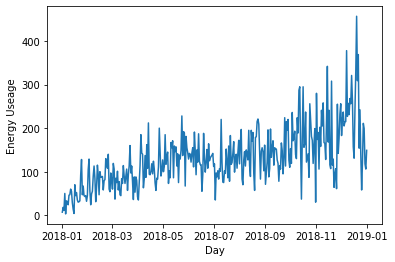

In [4]:
#Plot graph:

plt.xlabel("Day")
plt.ylabel("Energy Useage")
plt.plot(indexedDataset)

In [5]:
#Determining rolling statistics:

rolmean = indexedDataset.rolling(window=30).mean()
rolstd = indexedDataset.rolling(window=30).std()
print(rolmean, rolstd)

                Energy
Date                  
2018-01-01         NaN
2018-01-02         NaN
2018-01-03         NaN
2018-01-04         NaN
2018-01-05         NaN
...                ...
2018-12-27  235.366667
2018-12-28  236.100000
2018-12-29  232.300000
2018-12-30  227.300000
2018-12-31  226.166667

[365 rows x 1 columns]                Energy
Date                 
2018-01-01        NaN
2018-01-02        NaN
2018-01-03        NaN
2018-01-04        NaN
2018-01-05        NaN
...               ...
2018-12-27  82.711999
2018-12-28  82.273032
2018-12-29  85.054607
2018-12-30  87.972233
2018-12-31  88.777942

[365 rows x 1 columns]


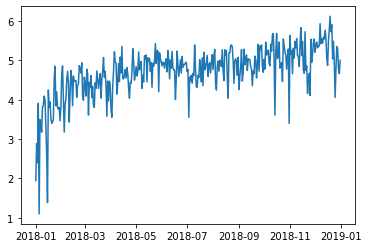

In [6]:
#Estimating trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

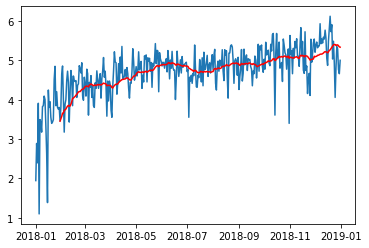

In [7]:
movingAverage = indexedDataset_logScale.rolling(window=30).mean()
movingSTD = indexedDataset_logScale.rolling(window=30).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

In [8]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(30)

#Remove Nan Values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(30)

,Energy
Date,
2018-01-30,0.009441
2018-01-31,0.288343
2018-02-01,1.076854
2018-02-02,1.200643
2018-02-03,0.362404
2018-02-04,-0.554208
2018-02-05,0.146381
2018-02-06,0.242782
2018-02-07,0.691200


In [9]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=30).mean()
    movingSTD = timeseries.rolling(window=30).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey Truller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['Energy'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value','#lags used', 'number of observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

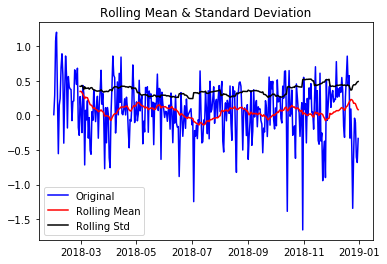

Results of Dickey-Fuller Test:
Test Statistic                -1.428257e+01
p-value                        1.316322e-26
#lags used                     0.000000e+00
number of observations Used    3.350000e+02
Critical Value (1%)           -3.450022e+00
Critical Value (5%)           -2.870207e+00
Critical Value (10%)          -2.571387e+00
dtype: float64


In [10]:
test_stationarity(datasetLogScaleMinusMovingAverage)

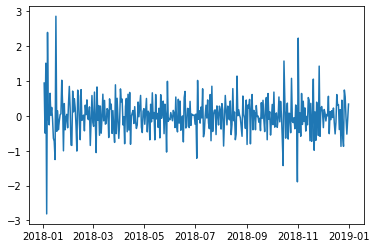

In [11]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift ()
plt.plot(datasetLogDiffShifting)

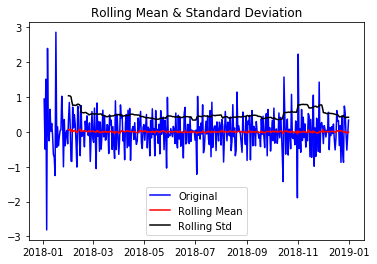

Results of Dickey-Fuller Test:
Test Statistic                -8.084658e+00
p-value                        1.430559e-12
#lags used                     1.300000e+01
number of observations Used    3.500000e+02
Critical Value (1%)           -3.449173e+00
Critical Value (5%)           -2.869833e+00
Critical Value (10%)          -2.571188e+00
dtype: float64


In [12]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

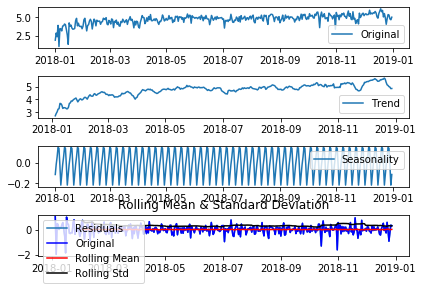

Results of Dickey-Fuller Test:
Test Statistic                -9.643446e+00
p-value                        1.499485e-16
#lags used                     1.500000e+01
number of observations Used    3.430000e+02
Critical Value (1%)           -3.449560e+00
Critical Value (5%)           -2.870004e+00
Critical Value (10%)          -2.571279e+00
dtype: float64


In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt. subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot (413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label ='Residuals')
plt.legend(loc='best')
plt. tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

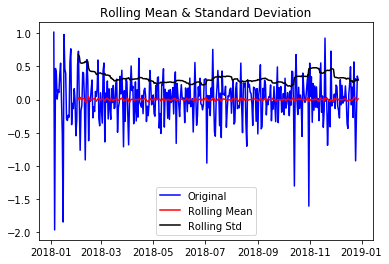

Results of Dickey-Fuller Test:
Test Statistic                -9.643446e+00
p-value                        1.499485e-16
#lags used                     1.500000e+01
number of observations Used    3.430000e+02
Critical Value (1%)           -3.449560e+00
Critical Value (5%)           -2.870004e+00
Critical Value (10%)          -2.571279e+00
dtype: float64


In [14]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


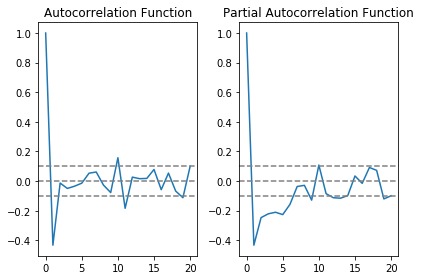

In [15]:
#ACF and PACF plots:

from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color= 'gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color = 'gray')
plt.title('Autocorrelation Function')
            
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color= 'gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color = 'gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color = 'gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Plotting AR model


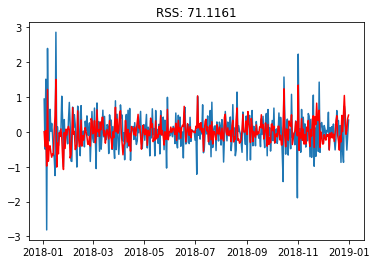

In [16]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model = ARIMA(indexedDataset_logScale, order = (2, 1, 2))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title( 'RSS: %.4f' % sum((results_AR.fittedvalues-datasetLogDiffShifting['Energy'])**2))
print('Plotting AR model')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Plotting MA model


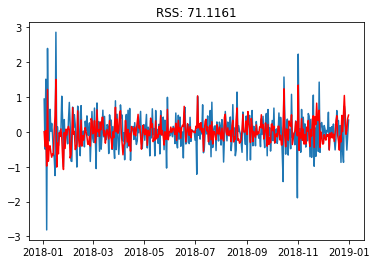

In [17]:
#MA MODEL
model = ARIMA(indexedDataset_logScale, order = (2, 1, 2))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title( 'RSS: %.4f' % sum((results_MA.fittedvalues-datasetLogDiffShifting["Energy" ])**2))
print('Plotting MA model')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RS5: 71.1161')

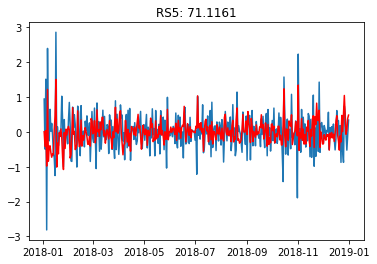

In [18]:
model = ARIMA(indexedDataset_logScale, order=(2, 1, 2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RS5: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting["Energy"])**2))

In [19]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)

print(predictions_ARIMA_diff.head())

Date
2018-01-02    0.005849
2018-01-03   -0.415622
2018-01-04    0.038132
2018-01-05   -0.980968
2018-01-06    1.221452
dtype: float64


In [20]:
#Convert to cumulative sum

predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2018-01-02    0.005849
2018-01-03   -0.409773
2018-01-04   -0.371641
2018-01-05   -1.352609
2018-01-06   -0.131157
dtype: float64


In [21]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['Energy'].ix[0], index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Date
2018-01-01    1.945910
2018-01-02    1.951759
2018-01-03    1.536137
2018-01-04    1.574269
2018-01-05    0.593301
dtype: float64

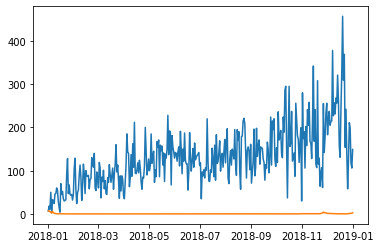

In [22]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

In [23]:
indexedDataset_logScale

,Energy
Date,
2018-01-01,1.945910
2018-01-02,2.890372
2018-01-03,2.397895
2018-01-04,3.912023
2018-01-05,1.098612
...,...
2018-12-27,5.351858
2018-12-28,5.293305
2018-12-29,4.770685


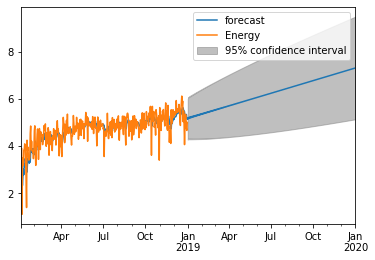

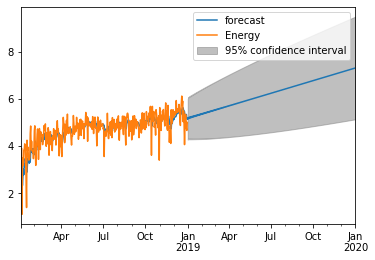

In [24]:
results_ARIMA.plot_predict(1,730)


In [25]:
#results_ARIMA.forecast(steps=365)

In [26]:
df=pd.DataFrame(dataset2['Date'])

In [27]:
df.head(365)

,Date
0,2018-01-01
1,2018-01-02
2,2018-01-03
3,2018-01-04
4,2018-01-05
...,...
360,2018-12-27
361,2018-12-28
362,2018-12-29
363,2018-12-30


In [28]:
df=pd.DataFrame(indexedDataset_logScale['Energy']+indexedDataset['Energy'])

In [29]:
df.head(365)

,Energy
Date,
2018-01-01,8.945910
2018-01-02,20.890372
2018-01-03,13.397895
2018-01-04,53.912023
2018-01-05,4.098612
...,...
2018-12-27,216.351858
2018-12-28,204.293305
2018-12-29,122.770685


In [30]:
df.to_csv('predictedset2019.csv')

In [31]:
#df=pd.DataFrame(indexedDataset_logScale+indexedDataset)

In [32]:
#for n in df.index:
#    df['Date'][n]+=datetime.timedelta(days=365)

In [33]:
#for n in indexedDataset_logScale.index:
#    dataset2['Energy'][n]=indexedDataset_logScale['Energy'][n]+indexedDataset['Energy'][n]

In [34]:
#dataset2.head(365)